1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [16]:
data_m['PJME_MW'] = data.resample('M').mean()['PJME_MW']
data_m.shape

(201,)

2. Подберите параметры модели SARIMAX для этого ряда.

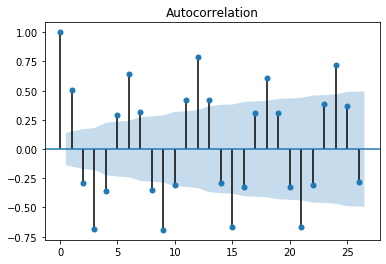

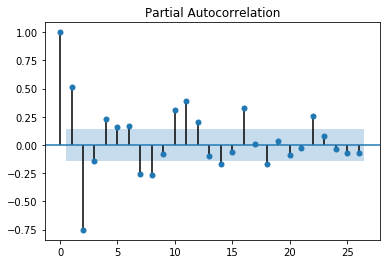

In [10]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=26)
plt.show()

In [28]:
# Определим p, d и q 
q = 2
p = 1
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с месячными данными, тогда сезонность это 12 месяцев
qs = 1
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs ,12]
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [1, 2, 2]    : ps,ds,qs, S= [0, 0, 1, 12]


In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
#для построения модели используем все данные, кроме 6 последних месяцев (это будет тестовый набор)
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-6],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print(f"SARIMAX{pdq}x{seasonal_pdq} - AIC:{results.aic}")

SARIMAX[1, 2, 2]x[0, 0, 1, 12] - AIC:3315.0651034785524


In [31]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  194
Model:             SARIMAX(1, 2, 2)x(0, 0, 1, 12)   Log Likelihood               -1652.533
Date:                            Sun, 02 Aug 2020   AIC                           3315.065
Time:                                    13:15:16   BIC                           3330.946
Sample:                                         0   HQIC                          3321.506
                                            - 194                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

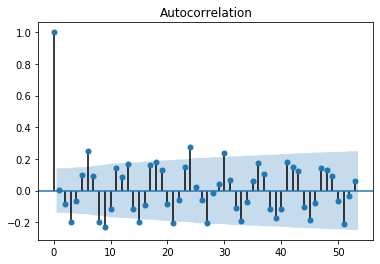

In [32]:
sm.graphics.tsa.plot_acf(results.resid, lags=53)
plt.show()

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

4. Возмите вариант 1 или 2  

    Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)  
    
    Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [51]:
path_brent = 'my_BRENT2019.csv'
brent = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data = brent.resample('W').mean()
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


In [49]:
brent_data.shape

(470,)

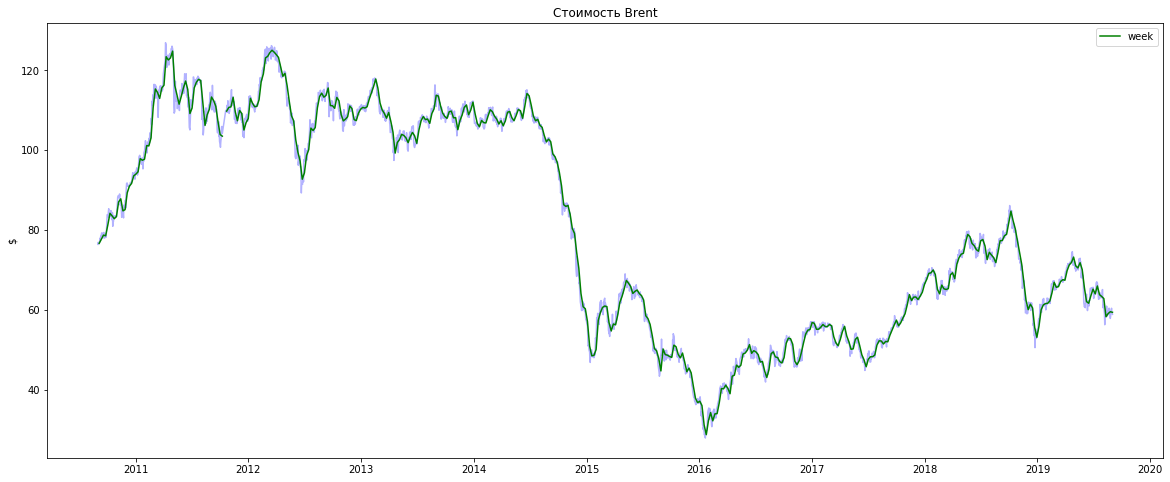

In [53]:
plt.figure(figsize =(20,8))
plt.plot( brent.index, brent['Значение'].values, 'b',alpha =0.3 )
plt.plot( brent_data.index, brent_data['Значение'].values, 'g',label='week'  )
plt.title('Стоимость Brent' )
plt.ylabel ( '$' )
plt.legend()
plt.show()

In [54]:
from statsmodels.tsa.arima_model import ARIMA

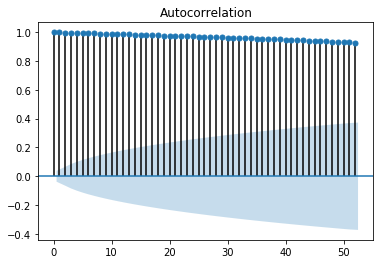

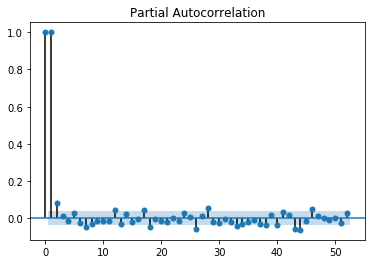

In [61]:
# Построим ACF и PACF
sm.graphics.tsa.plot_acf(brent['Значение'].values, lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(brent['Значение'].values, lags=52)
plt.show()

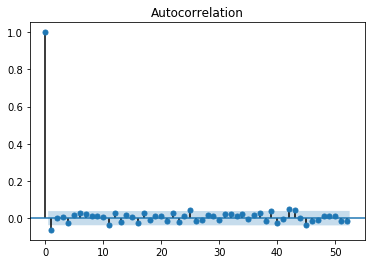

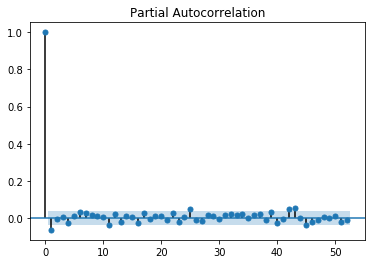

In [77]:
# Построим ACF и PACF для первых разностей

brent_dif = brent['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_dif[1:], lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=52)
plt.show()

In [67]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]

modb = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-30],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print(f'ARIMA{pdq} - AIC:{resultsb.aic}')

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:1908.2969766066926
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  440
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -948.148
Date:                Sun, 02 Aug 2020   AIC                           1908.297
Time:                        15:24:01   BIC                           1932.777
Sample:                             0   HQIC                          1917.957
                                - 440                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

In [80]:
brent_dif = brent_data['Значение'].diff(1)

In [83]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0,1)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_bd = sm.tsa.statespace.SARIMAX(brent_dif[:-30],order=param,seasonal_order=[0,0,0,0],
                                          stepwise=False, approximation=False, max_order=2)

        results_ = mod_bd.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:1955.8436578973915
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:2091.32688053162
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:1905.0548597087245
ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:2058.7458666615457


In [100]:
N1=20
N2=10
nforecast = N2+10
modb_optd = sm.tsa.statespace.SARIMAX(brent_dif[N1:-N2],
                               order=[1,0,0],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_optd = modb_optd.fit()
#делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = resultsb_optd.forecast(nforecast) 

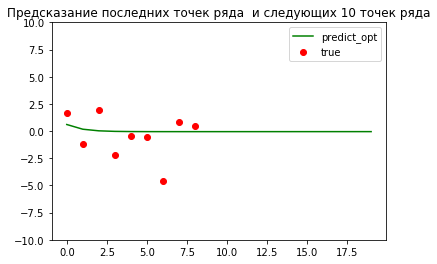

In [101]:
plt.plot(pred_dynamic_opt.values,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_dif.values[-N2:-1],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 10 точек ряда')
plt.ylim([-10,10])
plt.legend()
plt.plot()
plt.show()

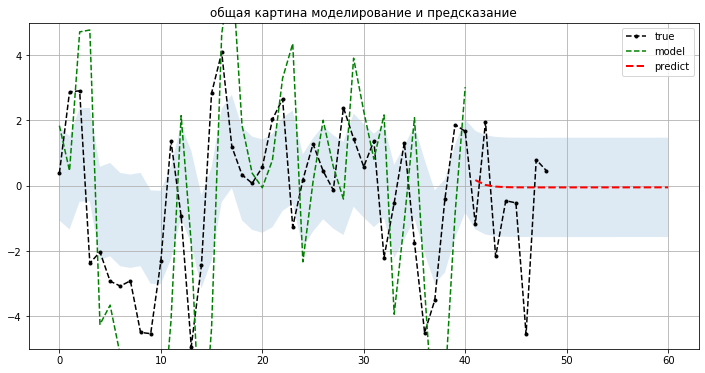

In [103]:
N3 = 400
predict_ = resultsb_optd.get_prediction(end=resultsb_optd.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(brent_dif.values[N3+N1:-1], '--k.',label='true')
plt.ylim([-5,5])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast]*5, '--g',label='model') # увеличена амплитуда в 5 раз - иначе не видно
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci.iloc[N3:, 0], predict_ci.iloc[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

5. Оцените результат моделирования

## Плохой

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

Стационарные модели.